In [1]:
import sys
sys.path.append('../')

In [2]:
from scripts.utils import data_path
from scripts.cross_match_scripts import build_keras_model, plot_metrics, assess_classifier, save_keras_classifier, assess_classifier, photo_prior_create_train_test_validation_data
import pandas as pd
from tqdm import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
import pickle
%matplotlib inline
photo_cat_scaled = pd.read_pickle('model/train_test_validation_data.pkl')

load_models = False


matplotlib settings set


matplotlib settings set


## GRZ data 

In [3]:
learning_dict = photo_prior_create_train_test_validation_data(photo_cat_scaled=photo_cat_scaled, features_cols = 'grz')

total x-ray sources:  11097
total non-x-ray sources:  120842
total sources:  131939
number of x-ray sources per flux bin:
x_ray_flux_bin
0    11097
dtype: int64
number of non-x-ray sources per flux bin:
x_ray_flux_bin
0    120842
dtype: int64
x-ray flux bins:
[3.00076359e-15 3.92776796e-12]
********************
flux bin:  3.0007635913564e-15 3.927767961003e-12
train features: 
  ['rel_dered_mag_g', 'rel_dered_mag_r', 'rel_dered_mag_z', 'rel_dered_g_r', 'rel_dered_r_z', 'rel_dered_g_z']
train size examples - filed:  67672
train size examples - x-ray: 6214
test size examples - filed:  16918
test size examples - x-ray 1554
validation size examples - filed:  36252
validation size examples - x-ray: 3329
downsampled field sources:  False
data is scaled


In [4]:
X_train, y_train, X_test, y_test, X_val, y_val = learning_dict[0]['X_train'], learning_dict[0]['y_train'], learning_dict[0]['X_test'], learning_dict[0]['y_test'], learning_dict[0]['X_val'], learning_dict[0]['y_val']


X_all = np.concatenate((X_train, X_test, X_val))
y_all = np.concatenate((y_train, y_test, y_val))[:,0]


#X_ctps = X_all[y_all == 1]
#X_field = X_all[y_all == 0]

features = ['rel_dered_mag_g', 'rel_dered_mag_r', 'rel_dered_mag_z', 'rel_dered_g_r', 'rel_dered_r_z', 'rel_dered_g_z']


df = pd.DataFrame(X_all, columns=features)
df['is_counterpart'] = y_all
df

,rel_dered_mag_g,rel_dered_mag_r,rel_dered_mag_z,rel_dered_g_r,rel_dered_r_z,rel_dered_g_z,is_counterpart
0,0.654846,0.627943,0.619496,0.094162,0.029564,0.123726,False
1,0.651567,0.647726,0.649112,0.013444,-0.004850,0.008595,False
2,0.670039,0.656021,0.649443,0.049064,0.023022,0.072086,False
3,0.684726,0.675158,0.659850,0.033488,0.053577,0.087066,False
4,0.652613,0.623819,0.610411,0.100779,0.046926,0.147705,False
...,...,...,...,...,...,...,...
131934,0.524762,0.506622,0.500532,0.063488,0.021316,0.084804,False
131935,0.642812,0.621129,0.615335,0.075889,0.020280,0.096169,False
131936,0.660256,0.640078,0.635252,0.070622,0.016891,0.087513,False
131937,0.680963,0.658976,0.635585,0.076954,0.081870,0.158824,False


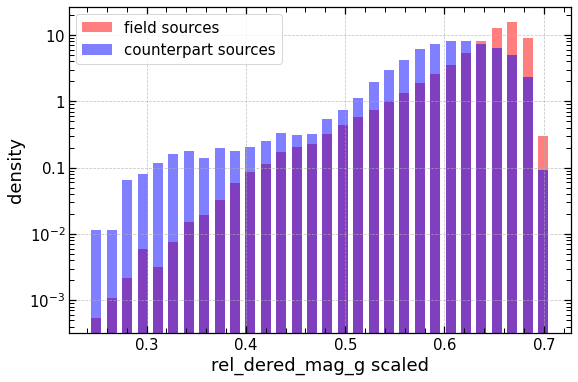

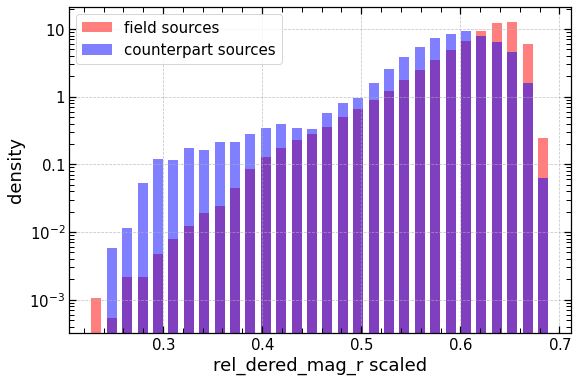

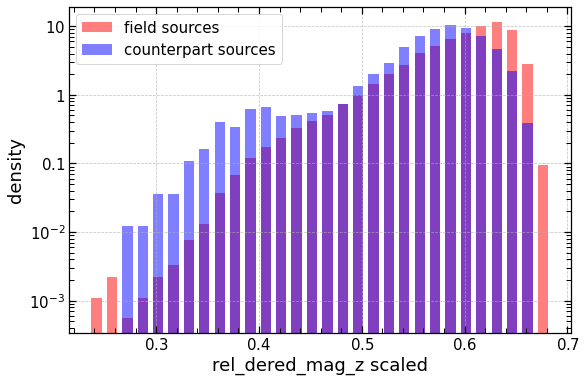

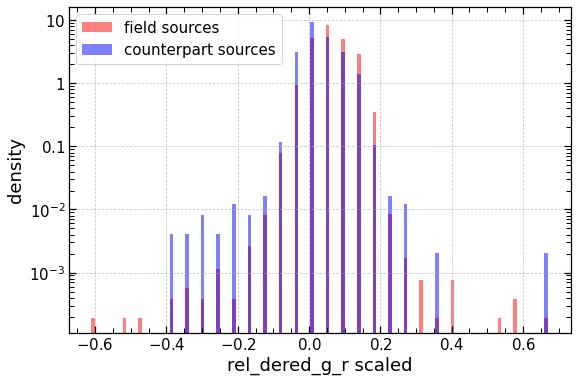

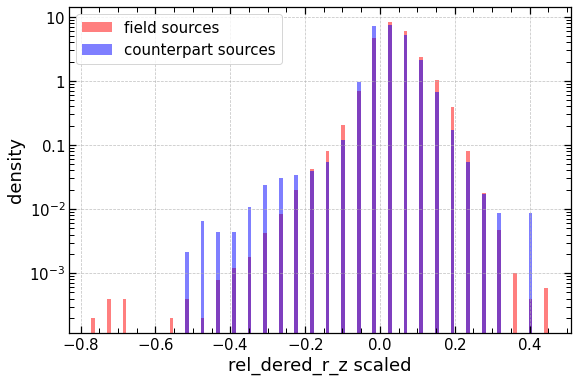

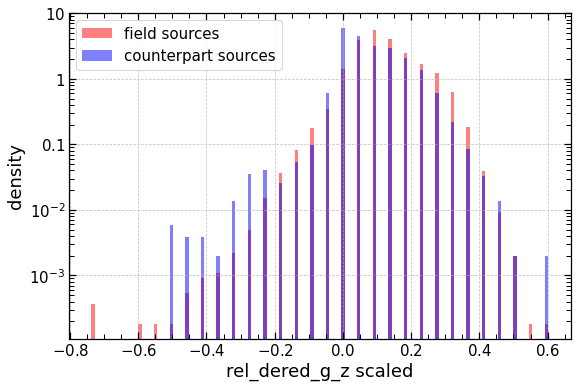

In [5]:
histbins = 30
for feature in features:
    f_ctps = df[df['is_counterpart'] == 1][feature]
    f_field = df[df['is_counterpart'] == 0][feature]

    #bins = np.linspace(f_field.min(), f_field.max(), histbins)
    hist_field, bin_field = np.histogram(f_field, bins=histbins, density=True)  
    hist_ctsp, bin_ctsp = np.histogram(f_ctps, bins=bin_field, density=True)

    plt.figure(figsize=(9,6))
    plt.bar(bin_field[:-1], hist_field, width=0.01, color='r', label='field sources', alpha = 0.5)
    plt.bar(bin_ctsp[:-1], hist_ctsp, width=0.01, color='b', label='counterpart sources', alpha = 0.5)
    plt.legend()
    plt.yscale('log')
    plt.xlabel(feature+' scaled')
    plt.ylabel('density')

    #save histograms in one file:
    #with columns lo, hi, selected, others
    hist_df = pd.DataFrame({'lo':bin_field[:-1], 'hi':bin_field[1:], 'selected':hist_ctsp, 'others':hist_field})

    hist_df.to_csv('./model/'+ feature +'.csv', index=False, sep = '\t', header = ['#lo', 'hi', 'selected', 'others'])




same as above, but without scaling

data unscaled: rel_dered_mag for mags,  rel_dered and not mag_ for colors


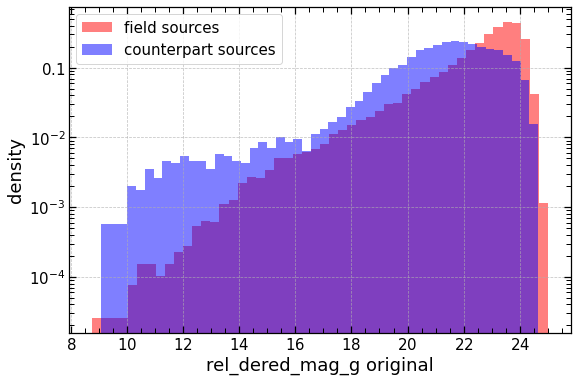

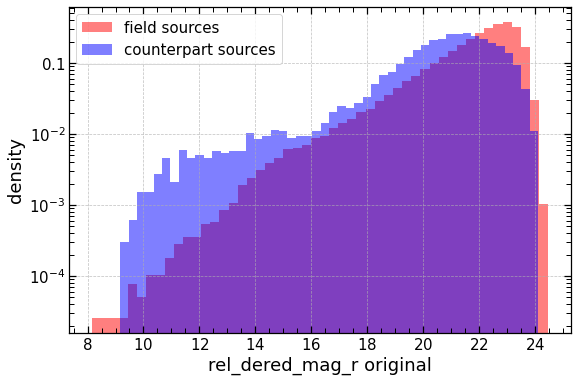

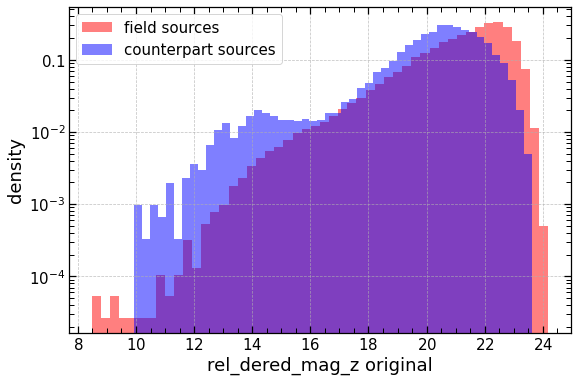

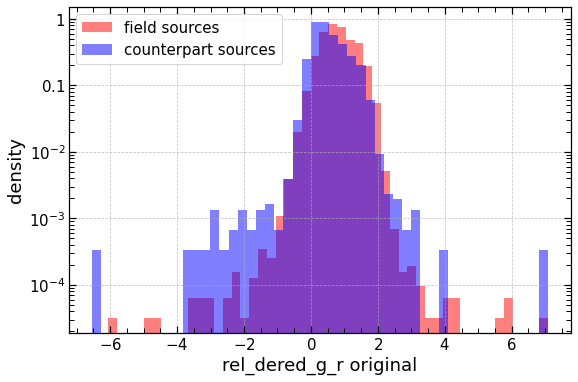

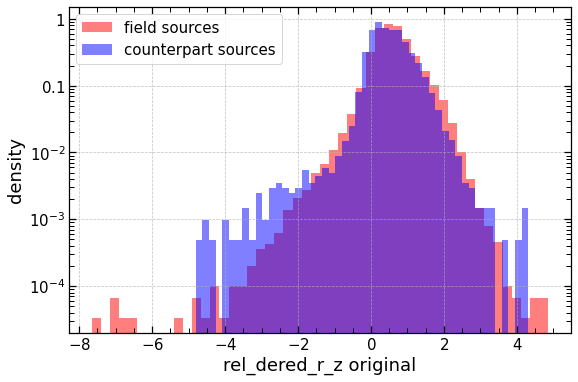

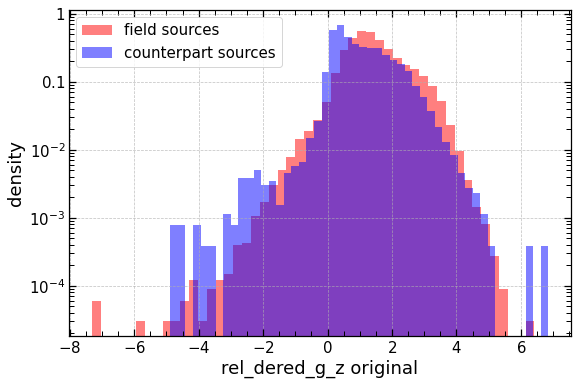

In [8]:
from scripts.cross_match_scripts import my_scaler_backward
df_orig = my_scaler_backward(df)
histbins = 50
for feature in features:
    f_ctps = df_orig[df_orig['is_counterpart'] == 1][feature]
    f_field = df_orig[df_orig['is_counterpart'] == 0][feature]


    #bins = np.linspace(f_field.min(), f_field.max(), histbins)
    plt.figure(figsize=(9,6))
    plt.hist(f_field, bins=histbins, color='r', label='field sources', alpha = 0.5, density=True)
    plt.hist(f_ctps, bins=histbins, color='b', label='counterpart sources', alpha = 0.5, density=True)
    plt.legend()
    plt.yscale('log')
    plt.xlabel(feature+' original')
    plt.ylabel('density')


